In [1]:
import scanpy as sc
import decoupler as dc
import numpy as np
import matplotlib as mpl

In [2]:
# 设置参数
mpl.rcParams["pdf.fonttype"] = 42  # 保留字体
sc.settings.verbosity = 4  # 输出细节
sc._settings.ScanpyConfig.n_jobs = -1  # 使用所有核心
sc.settings.set_figure_params(
    dpi=80,
    dpi_save=600,
    facecolor="white",
    frameon=False,  # remove frame
)

In [3]:
adata = sc.read_h5ad("anndata_cluster.h5ad")

In [4]:
makers = dc.get_resource("PanglaoDB")
makers

,genesymbol,canonical_marker,cell_type,germ_layer,human,human_sensitivity,human_specificity,mouse,mouse_sensitivity,mouse_specificity,ncbi_tax_id,organ,ubiquitiousness
0,CTRB1,False,Enterocytes,Endoderm,True,0.0,0.00439422,True,0.00331126,0.0204803,9606,GI tract,0.017
1,CTRB1,True,Acinar cells,Endoderm,True,1.0,0.000628931,True,0.957143,0.0159201,9606,Pancreas,0.017
2,KLK1,True,Endothelial cells,Mesoderm,True,0.0,0.00841969,True,0.0,0.0149153,9606,Vasculature,0.013
3,KLK1,False,Goblet cells,Endoderm,True,0.588235,0.00503937,True,0.903226,0.0124084,9606,GI tract,0.013
4,KLK1,False,Epithelial cells,Mesoderm,True,0.0,0.00823306,True,0.225806,0.0137585,9606,Epithelium,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8456,SLC14A1,True,Urothelial cells,Mesoderm,True,0.0,0.0181704,True,0.0,0.0,9606,Urinary bladder,0.008
8457,UPK3A,True,Urothelial cells,Mesoderm,True,0.0,0.0,True,0.0,0.0,9606,Urinary bladder,0.0
8458,UPK1A,True,Urothelial cells,Mesoderm,True,0.0,0.0,True,0.0,0.0,9606,Urinary bladder,0.0
8459,UPK2,True,Urothelial cells,Mesoderm,True,0.0,0.0,True,0.0,0.0,9606,Urinary bladder,0.0


In [6]:
# 过滤人类的高质量的marker基因
# makers = makers[(makers["human"] == "True") & (makers["canonical_marker"] == "True")]

# 小鼠
makers = makers[(makers["mouse"] == "True") & (makers["canonical_marker"] == "True")]

# 删除重复的条目
makers = makers[~makers.duplicated(["cell_type", "genesymbol"])]
makers[["cell_type", "genesymbol"]].to_csv("./table/18-ORA-makers.csv", index=False)
# makers["genesymbol"] = makers["genesymbol"].apply(str.title) # 鼠鼠首字母大写
makers

,genesymbol,canonical_marker,cell_type,germ_layer,human,human_sensitivity,human_specificity,mouse,mouse_sensitivity,mouse_specificity,ncbi_tax_id,organ,ubiquitiousness
1,CTRB1,True,Acinar cells,Endoderm,True,1.0,0.000628931,True,0.957143,0.0159201,9606,Pancreas,0.017
2,KLK1,True,Endothelial cells,Mesoderm,True,0.0,0.00841969,True,0.0,0.0149153,9606,Vasculature,0.013
5,KLK1,True,Principal cells,Mesoderm,True,0.0,0.00814536,True,0.285714,0.0140583,9606,Kidney,0.013
6,KLK1,True,Acinar cells,Endoderm,True,0.833333,0.00503145,True,0.314286,0.0128263,9606,Pancreas,0.013
7,KLK1,True,Plasmacytoid dendritic cells,Mesoderm,True,0.0,0.00820189,True,1.0,0.0129136,9606,Immune system,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8456,SLC14A1,True,Urothelial cells,Mesoderm,True,0.0,0.0181704,True,0.0,0.0,9606,Urinary bladder,0.008
8457,UPK3A,True,Urothelial cells,Mesoderm,True,0.0,0.0,True,0.0,0.0,9606,Urinary bladder,0.0
8458,UPK1A,True,Urothelial cells,Mesoderm,True,0.0,0.0,True,0.0,0.0,9606,Urinary bladder,0.0
8459,UPK2,True,Urothelial cells,Mesoderm,True,0.0,0.0,True,0.0,0.0,9606,Urinary bladder,0.0


In [16]:
category_to_object = makers.groupby("cell_type")["genesymbol"].apply(list).to_dict()
category_to_object.items()

dict_items([('Acinar cells', ['CTRB1', 'KLK1', 'RBPJL', 'PTF1A', 'PRSS3', 'CELA3A', 'PRSS1', 'SPINK1', 'ZG16', 'CEL', 'CELA2A', 'CPB1', 'CELA1', 'RNASE1', 'AMY2B', 'CPA2', 'CPA1', 'CELA3B', 'PNLIP', 'PLA2G1B', 'PRSS2', 'CLPS', 'SYCN', 'PNLIPRP1', 'CTRC', 'REG3A', 'CFB', 'GDF15', 'MUC1', 'DUOXA2', 'OLFM4', 'GSTA1', 'LGALS2', 'PDZK1IP1', 'RARRES2', 'CXCL17', 'UBD', 'GSTA2', 'ANPEP', 'ANGPTL4', 'ALDOB']), ('Adipocyte progenitor cells', ['FGF10', 'WT1', 'SCARA5', 'HOXC8', 'TCF7L1', 'HOXC9', 'EBF2', 'NRG4']), ('Adipocytes', ['RARRES2', 'EGFR', 'PPARG', 'HOXC9', 'EBF2', 'SLC36A2', 'P2RX5', 'LEP', 'UCP1', 'CIDEA', 'PRDM16', 'LHX8', 'EPSTI1', 'MC2R', 'FFAR2', 'PIKFYVE', 'CYP11B2', 'TLR2', 'TLR4', 'ADRB1', 'ADRB2', 'ADRB3', 'FABP4', 'TNFRSF9', 'TBX1', 'TMEM26', 'TCF21', 'ADIPOQ', 'CFD', 'ACVR1C', 'SLC2A4', 'LPIN1', 'PLIN1', 'PCK1', 'RETN', 'MEST', 'ADM2', 'STAT6', 'TFE3', 'CPPED1', 'AGT', 'SLC1A5', 'ACSL1', 'P16015', 'BCAT2', 'PNPLA2', 'CIDEC', 'CDO1', 'APOC1', 'MMP2', 'POSTN', 'LOX', 'COL6A2',

In [10]:
import json


# 美化存储
with open("./table/18-ORA-makers-pretty_data.json", "w") as json_file:
    json.dump(category_to_object, json_file, indent=4)

In [12]:
# """手动设置基因集
# MDSCs：髓系抑制细胞（Myeloid-derived suppressor cells），是一组具有抑制功能的异质髓系细胞群，通常通过CD11b和CD33的共表达来识别。
# G-MDSC：颗粒性MDSC（Granulocytic MDSC），一种以CD15或CD66b为标志的亚群，主要具有中性粒细胞的表型。
# M-MDSC：单核MDSC（Monocytic MDSC），通常通过CD14的表达以及HLA-DR的低表达或不表达来识别，具有单核细胞的表型。
# """

import pandas as pd

# # 定义数据
# # CEACAM8: CD66b  FUT4:CD15  ITGB2:CD11b
# data = {
#     "source": [
#         "MDSCs",
#         "MDSCs",
#         "MDSCs",
#         "G-MDSCs",
#         "G-MDSCs",
#         "M-MDSCs",
#         "M-MDSCs",
#         "M-MDSCs",
#         "M-MDSCs",
#     ],
#     "target": [
#         "CD33",
#         "ITGB2",
#         "ARG1",
#         "FUT4",
#         "CEACAM8",
#         "CD14",
#         "HLA-DRA",
#         "HLA-DRB5",
#         "HLA-DRB1",
#     ],
# }
data = {
    "cell_type": [
        "B cells",
        "B cells",
        "B cells",
        "B cells",
        "NK cells",
        "NK cells",
        "NK cells",
        "NK cells",
        "T cells",
        "T cells",
        "T cells",
        "T cells",
        "T cells",
        "Mast cells",
        "Mast cells",
        "Mast cells",
        "Mast cells",
        "Mast cells",
        "Dendritic cells",
        "Dendritic cells",
        "Dendritic cells",
        "Dendritic cells",
        "Macrophages",
        "Macrophages",
        "Macrophages",
        "Macrophages",
        "Macrophages",
        "Epineurial fibroblasts",
        "Epineurial fibroblasts",
        "Epineurial fibroblasts",
        "Endoneurial fibroblasts",
        "Endoneurial fibroblasts",
        "Endoneurial fibroblasts",
        "Endoneurial fibroblasts",
        "Endoneurial fibroblasts",
        "Perineurial fibroblasts",
        "Perineurial fibroblasts",
        "Perineurial fibroblasts",
        "Perineurial fibroblasts",
        "Perineurial fibroblasts",
        "Perineurial fibroblasts",
        "Smooth muscle cells",
        "Smooth muscle cells",
        "Smooth muscle cells",
        "Smooth muscle cells",
        "Endothelial cells",
        "Endothelial cells",
        "Endothelial cells",
        "Endothelial cells",
        "Schwann cells",
        "Schwann cells",
        "Schwann cells",
    ],
    "genesymbol": [
        "Ptprc",
        "Cd79a",
        "Cd79b",
        "Cd19",
        "Ptprc",
        "Klrb1c",
        "Klrb1a",
        "Cd8a",
        "Ptprc",
        "Cd8a",
        "Il2ra",
        "Cd3e",
        "Cd3d",
        "Ptprc",
        "Cpa3",
        "Tpsab1",
        "Cma1",
        "Mrgprb3",
        "Ptprc",
        "Siglech",
        "Fcrla",
        "Flt3",
        "Ptprc",
        "Csf1r",
        "Cd68",
        "Cd14",
        "Trem2",
        "Pdgfra",
        "Sfrp2",
        "Zfhx4",
        "Pdgfra",
        "Gpc3",
        "Tenm2",
        "Aldh1a1",
        "A2m",
        "Pdgfra",
        "Gpc3",
        "Slc16a11",
        "Klf5",
        "Itgb4",
        "Slc2a1",
        "Pdgfrb",
        "Myh11",
        "Des",
        "Acta2",
        "Vwf",
        "Sox17",
        "Flt1",
        "Fam110d",
        "Plp1",
        "Sox10",
        "S100b",
    ],
}
makers = pd.DataFrame(data)
makers.to_csv("markers.csv", index=False)
makers

,cell_type,genesymbol
0,B cells,Ptprc
1,B cells,Cd79a
2,B cells,Cd79b
3,B cells,Cd19
4,NK cells,Ptprc
5,NK cells,Klrb1c
6,NK cells,Klrb1a
7,NK cells,Cd8a
8,T cells,Ptprc
9,T cells,Cd8a


In [ ]:
## ora
"""ORA分析
    - 过度代表性分析富集分析
"""

In [8]:
from scipy.sparse import csc_matrix
import numpy

## 这里只支持csr稀疏矩阵，不支持csc稀疏矩阵
raw = adata.raw.to_adata()
raw.X = adata.raw.X.astype(numpy.float64).tocsr()
adata.raw = raw.copy()

In [17]:
makers.head()

,cell_type,genesymbol
0,B cells,Ptprc
1,B cells,Cd79a
2,B cells,Cd79b
3,B cells,Cd19
4,NK cells,Ptprc


In [16]:
dc.run_ora(
    mat=adata,
    net=makers,
    source="cell_type",
    target="genesymbol",
    min_n=3,
    verbose=True,
    seed=123,
    # use_raw=False,
)

Running ora on mat with 100484 samples and 17269 targets for 5 sources.


100%|██████████| 100484/100484 [03:03<00:00, 548.34it/s]


In [18]:
adata.obsm["ora_estimate"]

source,Endoneurial fibroblasts,Macrophages,Mast cells,Perineurial fibroblasts,T cells
AAACCTGAGGGCATGT-1_1,0.703018,-0.000000,-0.000000,0.633029,-0.000000
AAACCTGAGTACACCT-1_1,0.703018,-0.000000,-0.000000,0.633029,-0.000000
AAACCTGAGTACCGGA-1_1,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
AAACCTGCAGCATGAG-1_1,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
AAACCTGGTACTTGAC-1_1,-0.000000,-0.000000,-0.000000,-0.000000,4.777191
...,...,...,...,...,...
TTTGTCACACTAAGTC-1_33,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
TTTGTCACATGGGAAC-1_33,-0.000000,-0.000000,-0.000000,0.633029,-0.000000
TTTGTCAGTCGAACAG-1_33,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
TTTGTCATCAGAAATG-1_33,-0.000000,1.767361,0.703018,-0.000000,0.703018


In [19]:
## 可视化
acts = dc.get_acts(adata, obsm_key="ora_estimate")

acts_v = acts.X.ravel()
max_e = np.nanmax(acts_v[np.isfinite(acts_v)])
acts.X[~np.isfinite(acts.X)] = max_e

acts

/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 100484 × 5
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'keep', 'RNA_snn_res.0.3', 'RNA_snn_res.0.6', 'RNA_snn_res.1', 'RNA_snn_res.1.2', 'seurat_clusters', 'pANN', 'DF.classifications', 'RNA_snn_res.1.4', 'RNA_snn_res.1.6', 'cell_type', 'ident', 'sample', 'group', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'outlier', 'mt_outlier', 'discard', 'doublet_score', 'predicted_doublet', 'size_factors', '_scvi_batch', '_scvi_labels', 'leiden', 'leiden_0_25', 'leiden_0_5', 'leiden_2', 'leiden_00_25', 'leiden_00_5'
    uns: 'X_name', '_scvi

In [ ]:
# sc.pl.umap(
#     acts,
#     color=["NK cells"],
#     # cmap="RdBu_r"
# )

# # sc.pl.violin(acts, keys=["NK cells"], groupby="leiden_0_25")

In [20]:
## 看每个族中预测最多的细胞类型

leiden = "leiden_0_5"

# t-test_overestim_var: 是一种基于t-test的方法，overestim_var是一种过度估计方差的方法
df = dc.rank_sources_groups(
    acts, groupby=leiden, reference="rest", method="t-test_overestim_var"
)
df

,group,reference,names,statistic,meanchange,pvals,pvals_adj
0,0,rest,Endoneurial fibroblasts,16.819217,0.108409,3.571293e-63,4.464116e-63
1,0,rest,Perineurial fibroblasts,12.344792,0.067710,6.317693e-35,6.317693e-35
2,0,rest,T cells,-47.141060,-0.238826,0.000000e+00,0.000000e+00
3,0,rest,Mast cells,-50.208465,-0.097840,0.000000e+00,0.000000e+00
4,0,rest,Macrophages,-83.335470,-1.083933,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...
115,9,rest,Perineurial fibroblasts,-13.723988,-0.140232,3.089316e-42,3.089316e-42
116,9,rest,T cells,-21.023776,-0.204350,1.337152e-93,1.671440e-93
117,9,rest,Endoneurial fibroblasts,-21.566427,-0.245009,1.944293e-98,3.240489e-98
118,9,rest,Mast cells,-22.550773,-0.084525,6.424274e-107,1.606068e-106


In [21]:
## 提取每个族中预测最多的3个细胞类型

n_ctypes = 3
ctype_dict = (
    df.groupby("group")
    .head(n_ctypes)
    .groupby("group")["names"]
    .apply(lambda x: list(x))
    .to_dict()
)

ctype_dict

{'0': ['Endoneurial fibroblasts', 'Perineurial fibroblasts', 'T cells'],
 '1': ['Macrophages', 'Mast cells', 'T cells'],
 '10': ['T cells', 'Mast cells', 'Macrophages'],
 '11': ['Endoneurial fibroblasts', 'Perineurial fibroblasts', 'T cells'],
 '12': ['Mast cells', 'Macrophages', 'T cells'],
 '13': ['Perineurial fibroblasts', 'Endoneurial fibroblasts', 'T cells'],
 '14': ['Mast cells', 'T cells', 'Perineurial fibroblasts'],
 '15': ['Mast cells', 'T cells', 'Macrophages'],
 '16': ['Mast cells', 'T cells', 'Macrophages'],
 '17': ['Perineurial fibroblasts', 'Endoneurial fibroblasts', 'T cells'],
 '18': ['Mast cells', 'Macrophages', 'T cells'],
 '19': ['Mast cells', 'T cells', 'Macrophages'],
 '2': ['Macrophages', 'Mast cells', 'T cells'],
 '20': ['Mast cells', 'T cells', 'Perineurial fibroblasts'],
 '21': ['Mast cells', 'T cells', 'Macrophages'],
 '22': ['T cells', 'Mast cells', 'Endoneurial fibroblasts'],
 '23': ['Macrophages', 'Mast cells', 'T cells'],
 '3': ['Perineurial fibroblasts', 

    using data matrix X directly
Storing dendrogram info using `.uns['dendrogram_leiden_0_5']`


/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


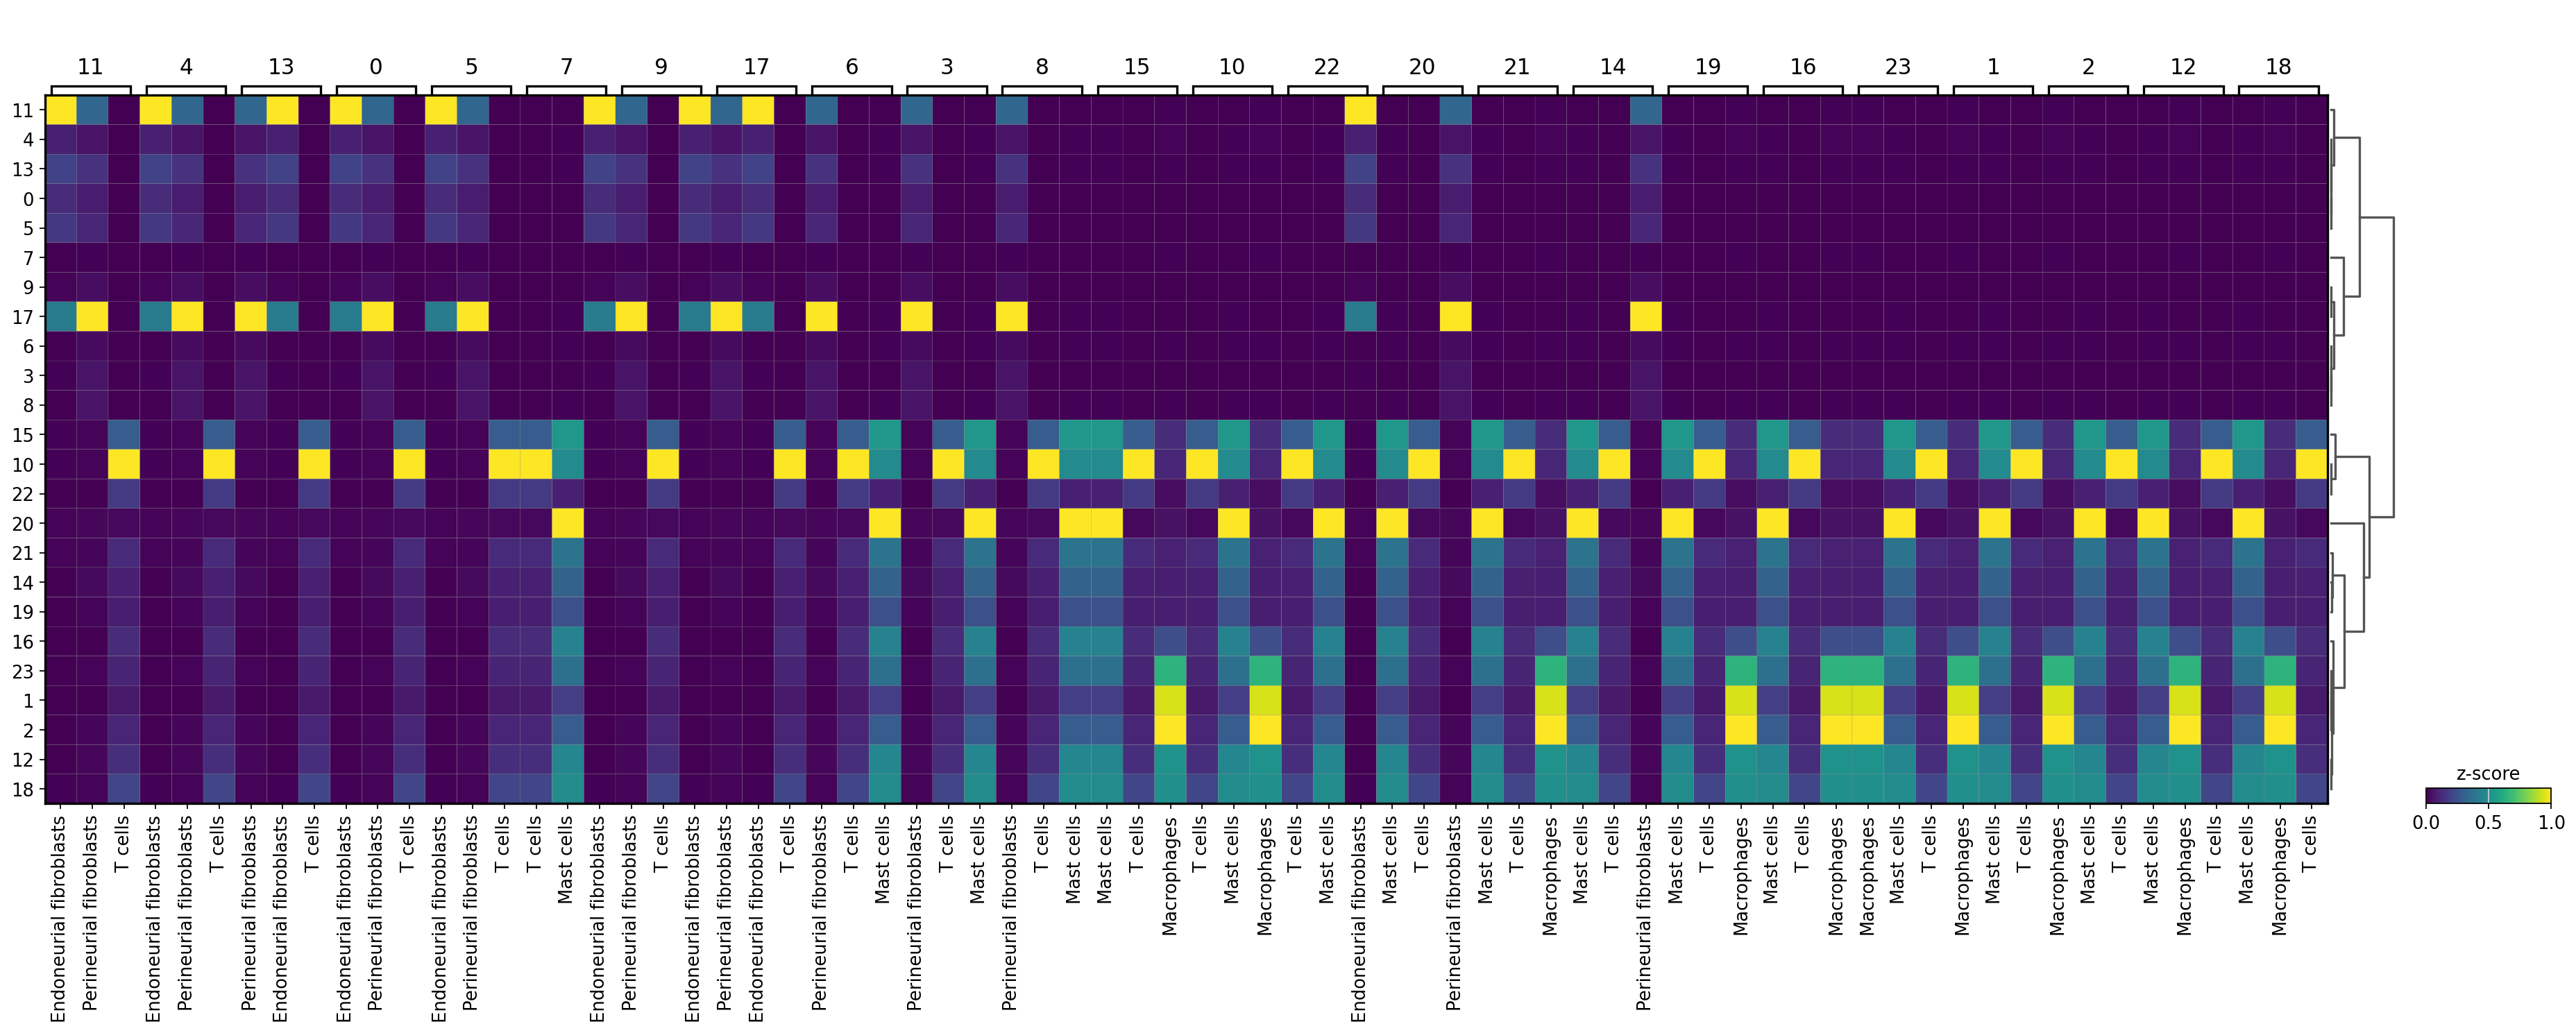

In [22]:
sc.pl.matrixplot(
    acts,
    ctype_dict,
    groupby=leiden,
    dendrogram=True,
    standard_scale="var",
    colorbar_title="z-score",
    save="-18-过度代表性注释-top3.pdf",
)

In [23]:
unique_values = {x for value in ctype_dict.values() for x in value}

unique_values

{'Endoneurial fibroblasts',
 'Macrophages',
 'Mast cells',
 'Perineurial fibroblasts',
 'T cells'}

In [24]:
%%capture
for x in unique_values:
    sc.pl.violin(
        acts,
        keys=x,
        groupby=leiden,
        stripplot=False,
        save=f"-18-细胞类型富集注释-{x}-leiden_2.pdf",
    )

In [25]:
%%capture
for x in unique_values:
    sc.pl.umap(
        acts,
        color=x,
        # cmap="RdBu_r",
        save=f"-18-细胞类型富集注释-{x}.pdf",
        vmin="p01",
        vmax="p99",
    )

In [26]:
# 选择top1
annotation_dict = df.groupby("group").head(1).set_index("group")["names"].to_dict()

annotation_dict

{'0': 'Endoneurial fibroblasts',
 '1': 'Macrophages',
 '10': 'T cells',
 '11': 'Endoneurial fibroblasts',
 '12': 'Mast cells',
 '13': 'Perineurial fibroblasts',
 '14': 'Mast cells',
 '15': 'Mast cells',
 '16': 'Mast cells',
 '17': 'Perineurial fibroblasts',
 '18': 'Mast cells',
 '19': 'Mast cells',
 '2': 'Macrophages',
 '20': 'Mast cells',
 '21': 'Mast cells',
 '22': 'T cells',
 '23': 'Macrophages',
 '3': 'Perineurial fibroblasts',
 '4': 'Endoneurial fibroblasts',
 '5': 'Endoneurial fibroblasts',
 '6': 'Perineurial fibroblasts',
 '7': 'T cells',
 '8': 'Perineurial fibroblasts',
 '9': 'Perineurial fibroblasts'}

In [ ]:
adata

/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/fanxi/miniconda3/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(c

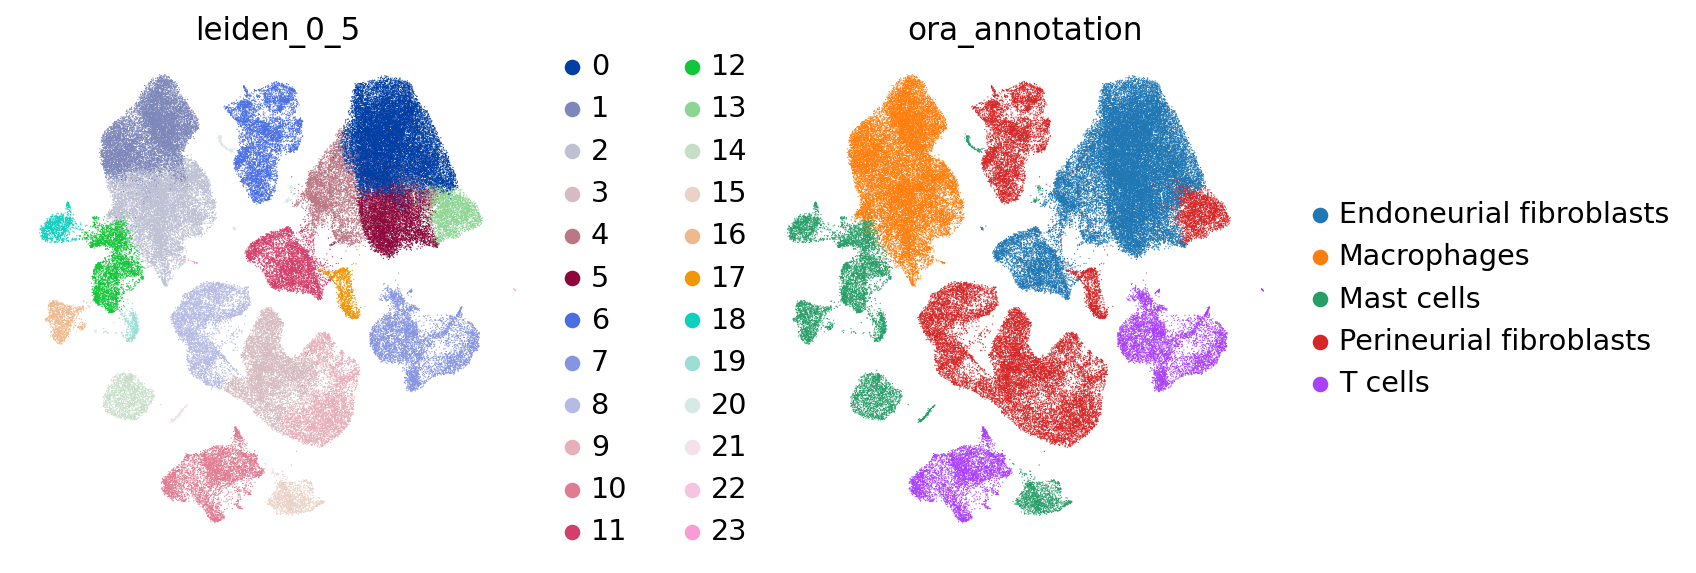

In [27]:
## 注释

adata.obs["ora_annotation"] = adata.obs[leiden].map(annotation_dict)

sc.pl.umap(
    adata,
    color=[
        leiden,
        "ora_annotation",
        # "celltypist_conf_score_coarse",
        # "celltypist_cell_label_coarse",
    ],
    ncols=2,
    wspace=0.3,
    save="-18-ora注释.pdf",
)

In [ ]:
# sc.pl.umap(
#     adata,
#     color=["PARP1", "MBD4", "TELO2", "NSMCE3", "SMUG1", "BABAM1"],
#     wspace=0.5,
#     save="-00-转录组基因表达情况.pdf",
# )

In [48]:
adata.write_h5ad("anndata_ora_anno.h5ad")